<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:30%"><img src='https://drive.google.com/uc?export=view&id=1iEILhi-REsl4vk6cfd7yhNiTrAB-RVat' style="width: 100px; height: 80px; "></th>
        <th style="text-align:center;"><h3>ANLY104 - Clustering</h3><h3>Wine Dataset Case Study</h3><h4>Solutions</h4></th>
    </tr>
</table>

**About the Data :** <br>
This is a dataset containing chemical properties of different types of wines. The columns contain the quantities of 13 chemical constituents found in wines. More details here - https://archive.ics.uci.edu/ml/datasets/Wine <br>
<br>

**Analytic Questions:**<br>
The following two questions will be investigated:

- Is it possible to predict the Cultivar of a wine by analyzing its chemical features?
- Which chemical features are more strongly related to a wine’s Cultivar?

This notebook covers the following : <br>
1. Reading wines dataset and performing EDA
2. Assessing based on EDA and Data Preparation
3. Determining suitable k for clustering using Elbow method
4. Applying k-means with suitable k and assigning cluster labels
5. Clusters profiling - Centroid method
    - Directly plot the cluster centroids as given by the model
    - Alternatively groupby clusters to determine centers


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Reading the data and basic EDA

In [3]:
# Read CSV file
wines = pd.read_csv('wine.csv')

In [4]:
# Print first 5 rows of dataset
wines.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
wines.iloc[0:2, 0:2]

,Alcohol,Malic.acid
0,14.23,1.71
1,13.20,1.78


In [16]:
wines.loc[0:2, 'Alcohol':'Ash']

,Alcohol,Malic.acid,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67


##### Find the number of rows and columns. Check if the data has missing values

In [4]:
# Print out statistics, including number of rows, columns and missing values
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


##### Print the basic descriptive stats for the data. Round the values to 3 decimal places

In [5]:
# Print statistics for each numeric variable,
# rounding to 3 decimal places
round(wines.describe(), 3)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


##### Plot the histograms for wines data

In [6]:
# Prepare to plot
%matplotlib inline

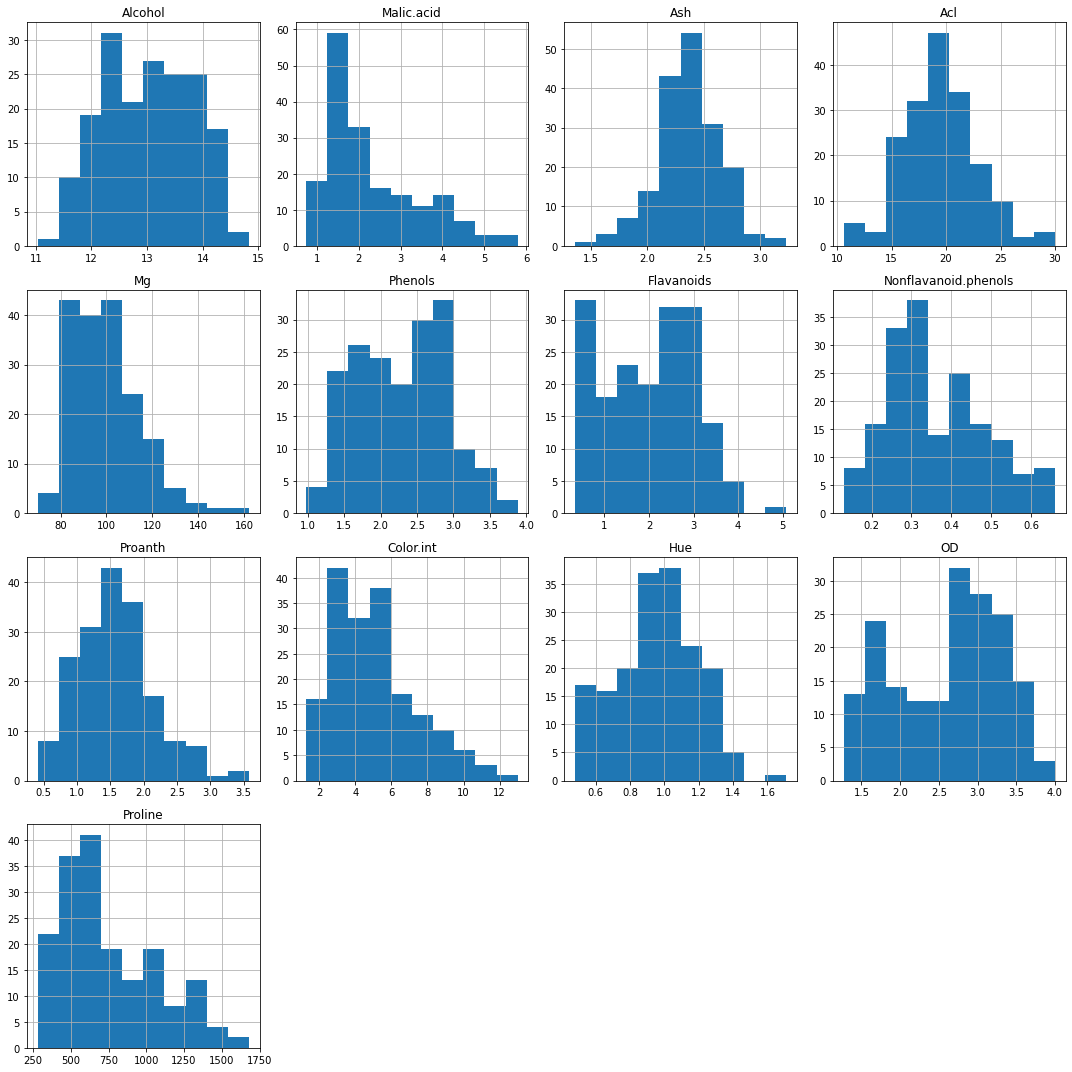

In [7]:
# Show histograms of all numeric variables in the dataset.
# "figsize" controls the size of the histogram.
wines.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. The skewness value can be positive or negative, or even undefined. If skewness = 0, the data are perfectly symmetrical. <br />
A skewness of exactly zero is quite unlikely for real-world data, so how can you interpret the skewness number?<br />
(Bulmer 1979) — a classic — suggests this <b>rule of thumb</b>:

- If skewness is <b>less than -1 or greater than 1</b>, the distribution is <b>highly</b> skewed.
- If skewness is <b>between -1 and -0.5 or between 0.5 and 1</b>, the distribution is </b>moderately</b> skewed.
- If skewness is <b>between -0.5 and 0.5</b>, the distribution is approximately <b>symmetric</b>.

Reference: https://brownmath.com/stat/shape.htm 

In [8]:
# Show skewness of numeric variables in dataset
wines.skew()

Alcohol                -0.051482
Malic.acid              1.039651
Ash                    -0.176699
Acl                     0.213047
Mg                      1.098191
Phenols                 0.086639
Flavanoids              0.025344
Nonflavanoid.phenols    0.450151
Proanth                 0.517137
Color.int               0.868585
Hue                     0.021091
OD                     -0.307285
Proline                 0.767822
dtype: float64

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br />Are there variables that are highly skewed and if yes which one(s)?

Put your answer below:

    2 variables may be considered as relatively skewed:
        - Malic.acid
        - Mg


### Summarizing EDA observations

 1) What are your observations from the EDA steps above?<br />
 2) Do we need to prepare the data before applying k-means?<br />
 3) Do variables require any transformation or standardization?

<b>Hint</b> : Look at the mean, std, histograms across variables. Check for scale differences and skewness.

Put your answer below:

    - We should transform those variables that are highly skewed.
    - The scale of variables is very different, so we should standardise the data.

### 2. Data preparation

#### 2.1 Variable Selection

The number of variables in this dataset is not too large. We will skip variable selection for now. 

#### 2.2 Data Transformation

The variables `Malic.acid` and `Mg` require some transformation. We may not always know up-front the type of necessary transformation. It may be `log` transformation, it may be `square root` transformation or other. It is often necessary to try several transformations to find the optimum one.<br />
In this notebook, we will just try the `log` transformation, but remember that it may not be the only one.

In [9]:
# Perform log transformation of some variables. 
# Create new variables, which will be the log of some old variables
wines['Log_Malic.acid'] = np.log(wines['Malic.acid'])
wines['Log_Mg'] = np.log(wines['Mg'])

# For square root transformation, we would do this instead:
# wines['SQRT_Malic.acid'] = np.sqrt(wines['Malic.acid'])
# wines['SQRT_Mg'] = np.sqrt(wines['Mg'])

In [10]:
# Show the addition of the new Log_Malic.acid and Log_Mg variables
print(wines.head())

   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  \
0                  0.28     2.29       5.64  1.04  3.92     1065   
1                  0.26     1.28       4.38  1.05  3.40     1050   
2                  0.30     2.81       5.68  1.03  3.17     1185   
3                  0.24     2.18       7.80  0.86  3.45     1480   
4                  0.39     1.82       4.32  1.04  2.93      735   

   Log_Malic.acid    Log_Mg  
0        0.536493  4.844187  
1        0.576613  4.605170  
2        0.858662  4.615121  
3        0.667829  4.727388  
4        0.951658  4.770685  


In [11]:
# Show skewness
print(wines.skew())

Alcohol                -0.051482
Malic.acid              1.039651
Ash                    -0.176699
Acl                     0.213047
Mg                      1.098191
Phenols                 0.086639
Flavanoids              0.025344
Nonflavanoid.phenols    0.450151
Proanth                 0.517137
Color.int               0.868585
Hue                     0.021091
OD                     -0.307285
Proline                 0.767822
Log_Malic.acid          0.274613
Log_Mg                  0.601445
dtype: float64


C:\Users\jasonchan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_Malic.acid'>

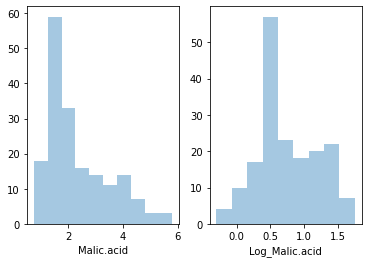

In [12]:
# Show histograms of 'Malic.acid' before and after transformation
fig, ax = plt.subplots(1, 2)
sns.distplot(wines['Malic.acid'], kde = False, ax = ax[0])
sns.distplot(wines['Log_Malic.acid'],  kde = False, ax = ax[1])

<AxesSubplot:xlabel='Log_Mg'>

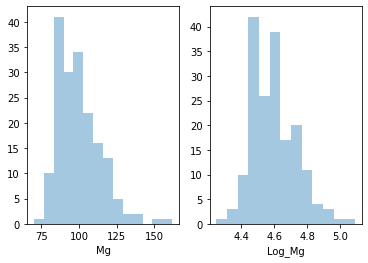

In [13]:
# Show histograms of 'Mg' before and after transformation
fig, ax2 = plt.subplots(1, 2)
sns.distplot(wines['Mg'], kde = False, ax = ax2[0])
sns.distplot(wines['Log_Mg'],kde = False, ax = ax2[1])

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br />Has the distribution changed between the original and the log transformation?

Put your answer below:

    - Yes, a transformation affects the shape of the distribution. In this case, we used log transformation, which will spread out the smaller values in the variable being transformed.

<b>With this improvement, we will use the transformed variables 'Log_Malic.acid' and 'Log_Mg' as part of the clustering variables. Let's drop the original variables.<br> <b>

In [14]:
# Create a new dataset, which does not include the old variables that were transformed
wines_trans = wines.drop(['Malic.acid', 'Mg'], axis = 1)

# Show first 5 rows of dataset
wines_trans.head()

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg
0,14.23,2.43,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.536493,4.844187
1,13.20,2.14,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0.576613,4.605170
2,13.16,2.67,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.858662,4.615121
3,14.37,2.50,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.667829,4.727388
4,13.24,2.87,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.951658,4.770685


#### 2.2 Standardization - Scaling the columns 

**Check this API Doc :** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [15]:
# Prepare to use a package for standardization
from sklearn.preprocessing import StandardScaler

In [16]:
# Scales data using z = (x - u) / s

# Create a StandardScaler object that will perform the scaling
scaler = StandardScaler()

# Give the dataset to the scaler, so that it can perform statistical analysis on the dataset
scaler.fit(wines_trans)

StandardScaler()

#### 1. Print the `mean` and `variance` attributes from the `scaler` object after calling `fit()`

In [17]:
# Show mean of original variables, before scaling
scaler.mean_

array([1.30006180e+01, 2.36651685e+00, 1.94949438e+01, 2.29511236e+00,
       2.02926966e+00, 3.61853933e-01, 1.59089888e+00, 5.05808988e+00,
       9.57449438e-01, 2.61168539e+00, 7.46893258e+02, 7.45051664e-01,
       4.59304201e+00])

In [18]:
# Show statistics of numeric variables of the 'wines_trans' dataset.
# Notice that the mean values are the same as above.
wines_trans.describe()

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.366517,19.494944,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.745052,4.593042
std,0.811827,0.274344,3.339564,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.450274,0.136627
min,11.030000,1.360000,10.600000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,-0.301105,4.248495
25%,12.362500,2.210000,17.200000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.471561,4.477337
50%,13.050000,2.360000,19.500000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.623257,4.584967
75%,13.677500,2.557500,21.500000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.125692,4.672829
max,14.830000,3.230000,30.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.757858,5.087596


In [19]:
# Show variance of original variables, before scaling
scaler.var_

array([6.55359730e-01, 7.48418003e-02, 1.10900306e+01, 3.89489032e-01,
       9.92113512e-01, 1.54016191e-02, 3.25754248e-01, 5.34425585e+00,
       5.19514497e-02, 5.01254463e-01, 9.86096010e+04, 2.01607859e-01,
       1.85621961e-02])


#### 2. Tranform the wines data using the `transform()` function

The function `transform()` is `Scikit-Learn` way of performing the function. Do not be confused with the Data Transformation which we did in Section 2.2.

#### Call the `transform()` function and save the result in `wines_scaled_np`.

In [20]:
# Scale the dataset
wines_scaled_np = scaler.transform(wines_trans)

In [21]:
# Show the dataset
wines_scaled_np

array([[ 1.51861254,  0.23205254, -1.16959318, ...,  1.01300893,
        -0.46448718,  1.84335927],
       [ 0.24628963, -0.82799632, -2.49084714, ...,  0.96524152,
        -0.3751346 ,  0.0890186 ],
       [ 0.19687903,  1.10933436, -0.2687382 , ...,  1.39514818,
         0.25302455,  0.16205222],
       ...,
       [ 0.33275817, -0.38935541,  0.15166079, ...,  0.28057537,
         1.57881801,  1.42722574],
       [ 0.20923168,  0.01273209,  0.15166079, ...,  0.29649784,
         0.46013964,  1.42722574],
       [ 1.39508604,  1.36520822,  1.50294326, ..., -0.59516041,
         1.48312691, -0.21060743]])

In [22]:
# What is the data type of scaled data returned by transform()?
type(wines_scaled_np)

numpy.ndarray

#### Let's create a DataFrame `wines_prepared` using `wines_scaled_np` as input and columns same as `wines_trans`

In [23]:
# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
wines_prepared = pd.DataFrame(wines_scaled_np, columns = wines_trans.columns)

In [24]:
# Show first 5 rows of dataset
wines_prepared.head()

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg
0,1.518613,0.232053,-1.169593,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.464487,1.843359
1,0.246290,-0.827996,-2.490847,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-0.375135,0.089019
2,0.196879,1.109334,-0.268738,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.253025,0.162052
3,1.691550,0.487926,-0.809251,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-0.171984,0.986074
4,0.295700,1.840403,0.451946,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.460140,1.303865


In [25]:
# Show statistics of numeric variables in dataset
wines_prepared.describe()

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.657245e-16,-1.160121e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18,-1.871162e-17,6.820387e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-3.679162e+00,-2.671018e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-2.329931e+00,-2.528911e+00
25%,-7.882448e-01,-5.721225e-01,-6.891372e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-6.090997e-01,-8.492551e-01
50%,6.099988e-02,-2.382132e-02,1.518295e-03,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,-2.712520e-01,-5.926561e-02
75%,8.361286e-01,6.981085e-01,6.020883e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,8.477374e-01,5.856208e-01
max,2.259772e+00,3.156325e+00,3.154511e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,2.255655e+00,3.629939e+00


<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br /><br />
Questions: 
- What is the mean and std dev of each variable?
- Why do we standardize (scale) all the variables?
- When we do transformation, do we tranform all the variables? 

Put your answer below:

    - For all variables, the mean is 0 (very close to) and the standard deviation is 1 (very close to).
    - This makes sense, since the point of standardization is to put all variables on the same scale for fair comparison, therefore we do it to all variables.
    - Transformation is only done on some variables (those that were very skewed).

**How do the histograms look after transformation and scaling?**

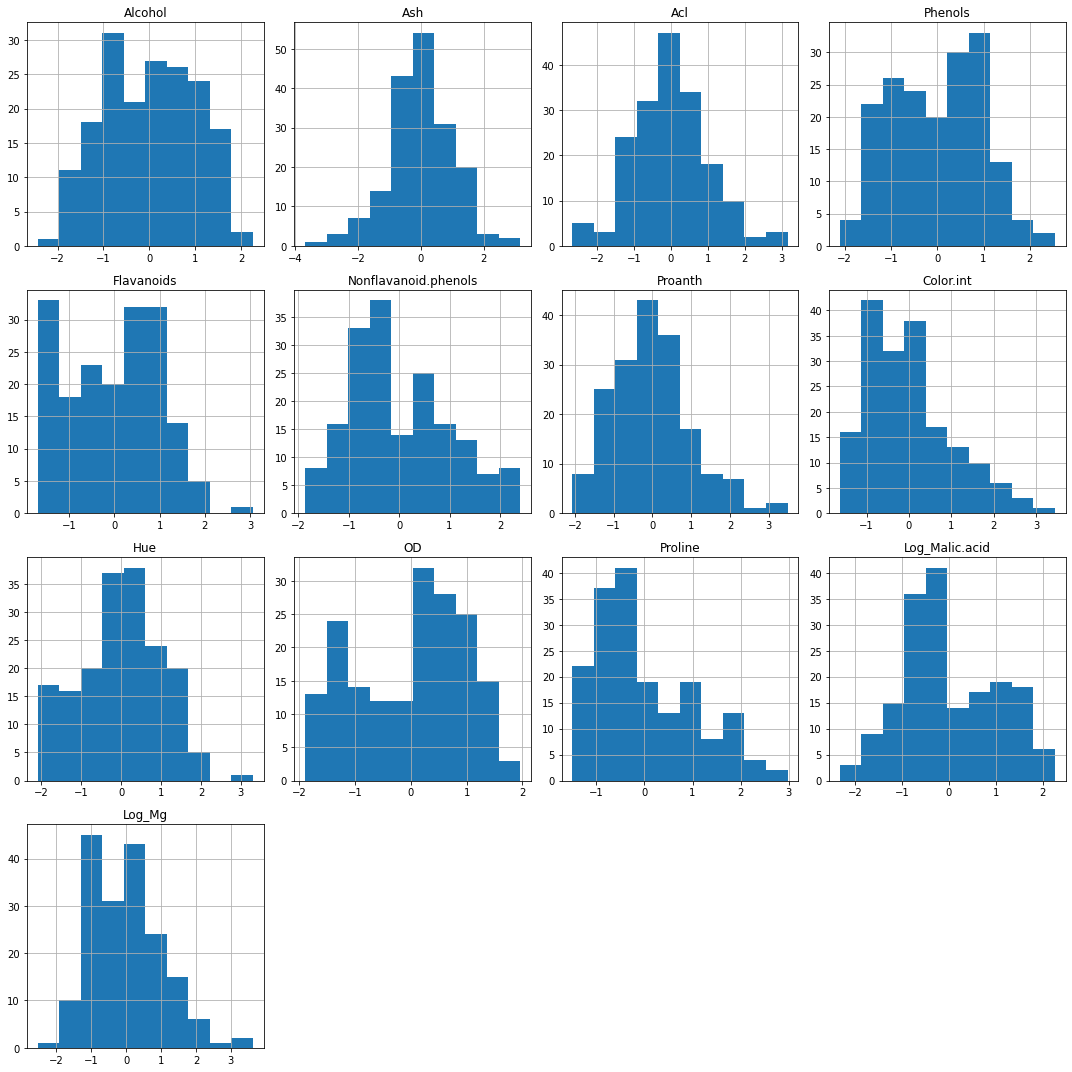

In [26]:
# Show histograms of all numeric variables in the dataset
wines_prepared.hist(figsize= (15,15))
plt.tight_layout()
plt.show()

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br /><br />
Question:
- Did the distribution change?


Put your answer below:

    - Standardization does NOT change the distribution of the data, it only changes the scale (x-axis values).
    - The distribution only changes when we transform variables.

### 3. Modeling using KMeans

#### 3.1 Finding value of k
**We will use the transformed and scaled data in `wines_prepared` for clustering** <br>
**Plot the Elbow curve for k = (1, 7) and find the suitable k.**

In [27]:
# Prepare to perform k-means clustering
from sklearn.cluster import KMeans

In [28]:
# Calculate SSE for values 1 to 7 inclusive.
# For our k-means clustering:
#     - 'n_clusters': How many clusters (k)
#     - 'max_iter': Maximum number of iterations to be run
#     - 'tol': Tolerence (the smaller the value, the smaller a change from one iteration to the next to achieve convergence)
#     - 'n_init': Number of clustering models, i.e. how many different initial states from which we create different
#                    k-means models; the final results are shown for the best model with lowest inertia (SSE)
#     - 'random_state': We choose a specific random state so that we have a fair comparison between different models
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters = i, max_iter=300, tol=0.0001, n_init=10, random_state=99)
    model_i.fit(wines_prepared)
    SSE.append(model_i.inertia_)

C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

In [29]:
# Show the SSE values
SSE

[2314.0,
 1659.787650077193,
 1272.237865682563,
 1174.9615537022853,
 1098.61787950913,
 1048.0284178816382,
 988.7704937362762]

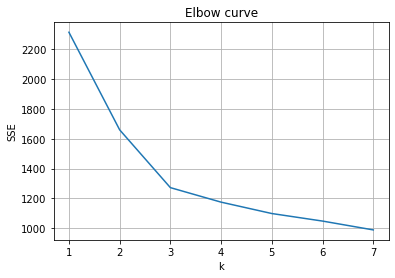

In [30]:
# Plot the elbow curve
k = (range(1,8))
plt.plot(k, SSE)

# Add more information to plot.
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

#### 3.2 Perform clustering with selected k


**Perform clustering with n_clusters = 3, random_state = 99. Use k = 3.**

In [31]:
# Run k-means clustering with 3 clusters
model = KMeans(n_clusters = 3, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(wines_prepared)

C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=99)

In [32]:
# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

Attributes of the clustering solution for k=3:
SSE : 1272.2
Num of iterations : 7

Cluster centers : [[ 0.16490746  0.18689833  0.52436746 -0.97933029 -1.21524764  0.72606354
  -0.77970639  0.94153874 -1.16478865 -1.29241163 -0.40708796  0.86570474
  -0.05379777]
 [ 0.83523208  0.36470604 -0.61019129  0.88523736  0.97781956 -0.56208965
   0.58028658  0.17106348  0.47398365  0.77924711  1.12518529 -0.20924313
   0.60221578]
 [-0.92607185 -0.49451676  0.17060184 -0.07598265  0.02081257 -0.03353357
   0.0582655  -0.90191402  0.46180361  0.27076419 -0.75384618 -0.47965951
  -0.53221065]]


<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br /><br />
Questions: 
- Did the clustering solution converge?
- State why. 

Put your answer below:

    - Yes, convergence was reached because k-means only ran for 5 iterations, which is less than max_iter = 300 (default value).

### 4. Cluster Evaluation and Profiling (Interpretation)

#### 4.1 Cluster Evaluation

In [33]:
# Compare the improvement of clustering by the measure of the total variance 
# Note: If k = 1, there is no clustering
# hence Total SSE is given by the inertia of the model when k=1
between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

The improvement of SSE due to clustering (k=3) is: 45.02%


The clustering brings some improvement. But this improvement only considers the <b>cohesion within the clusters</b>. By increasing k, one can achieve a better improvement, but the clusters may not be well separated.

The <b>silhouette score</b> takes into consideration both the <b>cohesion</b> and <b>separation</b>.

[Optional] 
The <b>silhouette score</b> is a measure of <b>how similar an object is to its own cluster</b> (cohesion) <b>compared to other clusters</b> (separation).<br />
- The silhouette ranges from −1 to +1, where a high value indicates that the data is appropriately clustered. <br />
- A value close to 0 means that there may be overlapping clusters. 
- If the score is negative, then it may mean poor clustering performance.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [34]:
# (FYI ONLY - will not be tested)
#================================

# Prepare to use silhouette score
from sklearn.metrics import silhouette_score

# Calculate silhouette score of the model
silhouette_score(wines_prepared, model.labels_)

0.28884757172641357

**Store the cluster labels in a new column named 'cluster' in the `wines` dataframe** <br>
Print the counts of number of observations per cluster

In [35]:
# Add a new "cluster" column to the original wines dataset,
# to indicate in which cluster each record belongs to
wines['cluster'] = model.labels_

In [36]:
# Show first 5 rows of dataset
wines.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.536493,4.844187,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0.576613,4.605170,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.858662,4.615121,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.667829,4.727388,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.951658,4.770685,1


In [37]:
# Show all possible "cluster" values, and how often each one occurs
wines['cluster'].value_counts()

2    65
1    62
0    51
Name: cluster, dtype: int64

The observations are relatively well distributed across the clusters.

#### 4.2 Cluster Profiling (Interpretation)

**Plot the cluster centroids as given by the model. This helps us check the variable properties per cluster :**

In [38]:
# Show cluster centroids
model.cluster_centers_

array([[ 0.16490746,  0.18689833,  0.52436746, -0.97933029, -1.21524764,
         0.72606354, -0.77970639,  0.94153874, -1.16478865, -1.29241163,
        -0.40708796,  0.86570474, -0.05379777],
       [ 0.83523208,  0.36470604, -0.61019129,  0.88523736,  0.97781956,
        -0.56208965,  0.58028658,  0.17106348,  0.47398365,  0.77924711,
         1.12518529, -0.20924313,  0.60221578],
       [-0.92607185, -0.49451676,  0.17060184, -0.07598265,  0.02081257,
        -0.03353357,  0.0582655 , -0.90191402,  0.46180361,  0.27076419,
        -0.75384618, -0.47965951, -0.53221065]])

In [39]:
# Create a DataFrame of cluster centroids.
# Each row corresponds to a cluster centroid, so row 0 corresponds to cluster label = 0, etc.
clust_means = pd.DataFrame(model.cluster_centers_, columns=wines_prepared.columns)
clust_means

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg
0,0.164907,0.186898,0.524367,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088,0.865705,-0.053798
1,0.835232,0.364706,-0.610191,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185,-0.209243,0.602216
2,-0.926072,-0.494517,0.170602,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846,-0.479660,-0.532211


It is not trivial to analyse the profile of the clusters with those 13 variables. So we suggest to draw a heatmap.

##### Seaborn heatmap for profiling using centroid method

In [40]:
# Prepare to generate heatmap
import seaborn as sns

<AxesSubplot:>

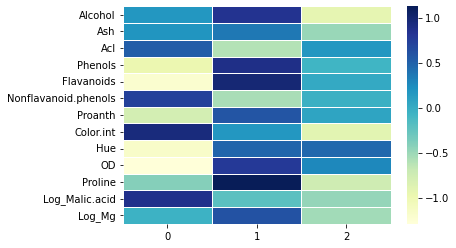

In [41]:
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

**Cluster interpretation**<br>
The above cluster composition indicates that some cultivars have specific chemical signatures. 

For instance, based on the centroids: 

- <b>Cluster 0</b> has very high Malic Acid, nonflavanoid phenols, strong color intensity and Alcalinity (Acl). <br />
The wines of this cluster have reasonably high Magnesium, Ash and Alcohol levels. 

- <b>Cluster 1</b> is characterized by very high alcohol, flavanoids, and proline levels. <br />
Most other chemical components are above the average range, except for Alcalinity (Acl) and Nonflavanoid phenols.

- <b>Cluster 2</b> is characterized by most variables having low or average values, with the exception of high values of Hue. 


Note: the cluster numbers may differ on your own laptop.

#### Practice. Cluster based question:

In [42]:
# Show average value of Proline in the cluster with 62 observations, using the wines dataset

# Method 1
wines.groupby('cluster')['Proline'].mean()

cluster
0     619.058824
1    1100.225806
2     510.169231
Name: Proline, dtype: float64

In [43]:
# Method 2
round(wines[wines['cluster'] == 2]['Proline'].mean(), 2)

510.17

## Part 5 & 6 will be optional (will not be tested)

### 5. Weighting


We will illustrate the use of weighting on a selected variable. 
<br />Suppose a customer wants to buy a wine with a higher level of Magnesium. We want to select the right wine for that customer. 
So we are going to add a weight to the variable representing Magnesium.

In [44]:
# Create a separate DataFrame, copied from 'wines_prepared'
wines_weighted = pd.DataFrame(wines_prepared, columns=wines_prepared.columns)

In [45]:
# Weight the 'Log_Mg' variable by 4, meaning that we consider it 4 times more important than other variables.
# We will create a new variable 'Log_Mg_Wt' to store these weighted values
wgt = 4
wines_weighted['Log_Mg_Wt'] = wines_weighted['Log_Mg']*wgt
wines_weighted.head()

,Alcohol,Ash,Acl,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Log_Malic.acid,Log_Mg,Log_Mg_Wt
0,1.518613,0.232053,-1.169593,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.464487,1.843359,7.373437
1,0.246290,-0.827996,-2.490847,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-0.375135,0.089019,0.356074
2,0.196879,1.109334,-0.268738,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.253025,0.162052,0.648209
3,1.691550,0.487926,-0.809251,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-0.171984,0.986074,3.944295
4,0.295700,1.840403,0.451946,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.460140,1.303865,5.215458


In [46]:
# Remove the old 'Log_Mg' unweighted variable
wines_weighted = wines_weighted.drop(['Log_Mg'], axis = 1)

In [47]:
# Run k-means clustering using this new dataset with the weighted variable
model_wt = KMeans(n_clusters = 3, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model_wt.fit(wines_weighted)

C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=99)

<AxesSubplot:>

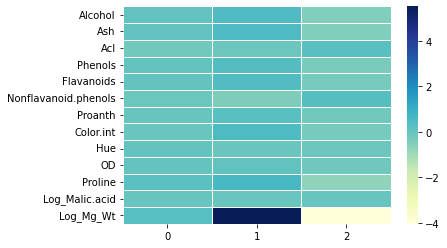

In [48]:
# Visualize the cluster centroids
clust_means_wt = pd.DataFrame(model_wt.cluster_centers_, columns=wines_weighted.columns)
sns.heatmap(clust_means_wt.T,  linewidths=.5, cmap="YlGnBu")

Question: What do you observe about the formation of the clusters?

Answer: The cluster formation is dominated by the weighted variable. 

In this particular example, the value of `wgt` has been arbitrarily set. <br >
One may want to fine tune that value to also consider the other properties of wines.

### 6. Model Comparisons

Perhaps, you might wonder - what is the effect if we do not transform or standardize the data?
<br>Let's run k-means clustering based on original data, i.e., wines. Use k = 3.

In [49]:
# Run k-means clustering on the original wines dataset, without transformation and standization
model2 = KMeans(n_clusters = 3, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model2.fit(wines)

C:\Users\jasonchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=99)

Let's look at the profile of the clusters.

In [50]:
# Create DataFrame of cluster centroids
clust_means2 = pd.DataFrame(model2.cluster_centers_, columns=wines.columns)

<AxesSubplot:>

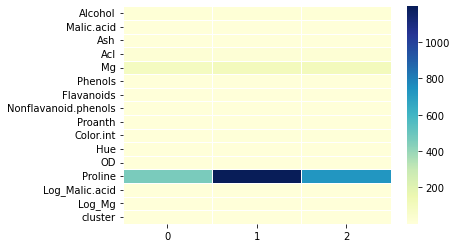

In [51]:
# Show heatmap of cluster centroids
sns.heatmap(clust_means2.T,  linewidths=.5, cmap="YlGnBu")

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoeUJ4NUxtMlVNNnM' style="width: 60px; height: 60px;"><br /><br />
Question: 
- What do you notice about the clusters features?

Put your answer below:

    - The clusters are dominated by Proline, but only because that variable had such high original values compared to all other variables. Doing this would be similar to only using the Proline variable and splitting into 3 bins. This would ignore all other variables, even though they may contain important information.

This is the reason why we need to <b>standardize</b> the variables when one or nore variables have a range of values much higher than the rest of the variables.